<h1><center>

![](https://i.imgur.com/jrRGMfx.png)

AI PRACTITIONER COURSE 

ASSIGNMENT - SESSION 3 - Multi Layers Perceptron

**&copy; 2020 VTCA-COTAI. Internal Use Only.**

</center></h1>

# 3.1 Theory

## 3.1.1 
How to go from linear to nonlinear models? Cách chung phổ biến để có các mô hình học máy phi tuyến là làm thế nào? 

**Answer**: Dùng hàm phi tuyến biến đổi đặc trưng (nonlinear feature transform functions $\Phi(\mathbf{x})$. Xem thêm chi tiết trong slides.

## 3.1.2 
Equation of general form of MLP? What do hidden layers of MLP do? Viết phương trình tổng quát của mô hình MLP. Các lớp "ẩn" có chức năng gì? 

**Answer**: $s(W'z'+b')$ with $z' = \gamma(Wz+b)$. Các lớp ẩn chính là các hàm phi tuyến biến đổi đặc trưng $z' = \Phi(z)$ để không gian đặc trưng cuối cùng $Z'$ dễ sử dụng các mô hình tuyến tính để dự báo. 

# 3.2 Coding



**Lưu ý nhớ setup cho Colab dùng GPU**

Chạy cell bên dưới để clone repository 'spiraldataset' về Colab


In [ ]:
!git clone https://github.com/Susros/spiralsdataset.git

fatal: destination path 'spiralsdataset' already exists and is not an empty directory.


Dùng repository vừa clone về để tạo dataset cho bài tập

In [ ]:
import numpy as np
np.random.seed(42)
from spiralsdataset import spiralsdataset
from tensorflow.keras.utils import to_categorical

MAX_RADIUS = 3

def generate_data():
  points, classes = spiralsdataset.generate_three_spirals_dataset(density=40,maxRadius=MAX_RADIUS)
  X = np.array(points)
  y = np.array(classes)
  Y = to_categorical(y, 3)
  return X, y, Y
  

Gọi hàm generate_data() ở trên

In [ ]:
# TODO:
# 1. call the generate_function() above
# 2. Note: try to understand the different between y and Y
X, y, Y = generate_data()
print('Shape of X:', X.shape)
print('Shape of Y:', Y.shape)
print('Shape of y:', y.shape)


Shape of X: (11520, 2)
Shape of Y: (11520, 3)
Shape of y: (11520, 1)


**Visualize data**

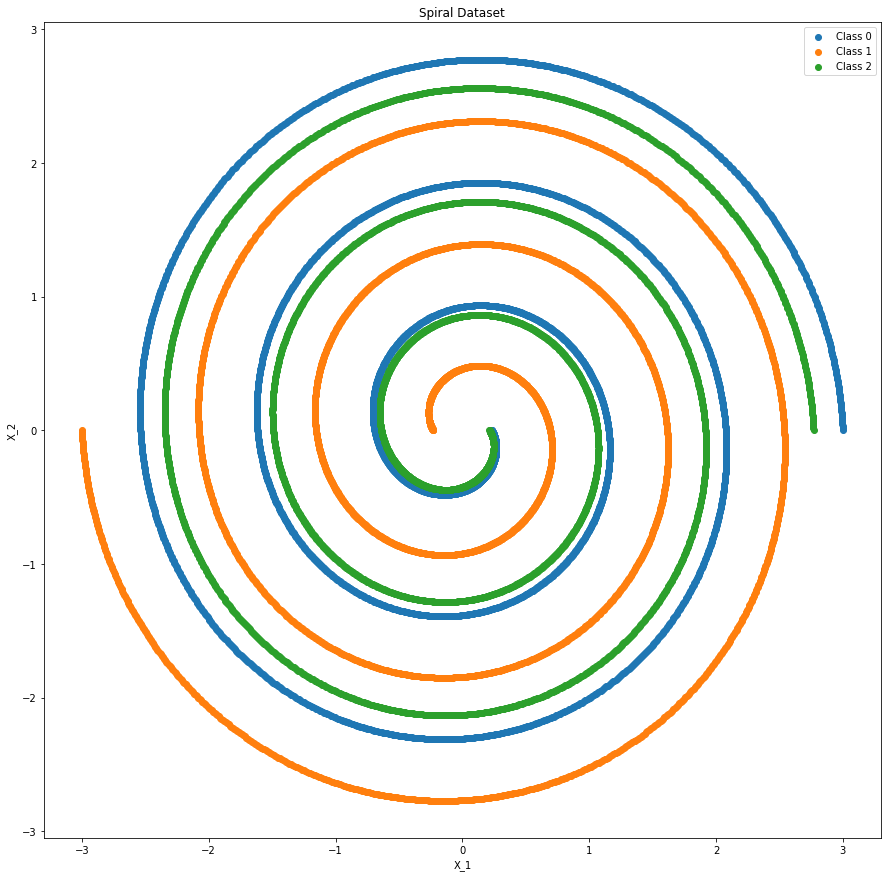

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
plt.scatter(X[np.where(y==0)[0]][:,0], X[np.where(y==0)[0]][:,1])
plt.scatter(X[np.where(y==1)[0]][:,0], X[np.where(y==1)[0]][:,1])
plt.scatter(X[np.where(y==2)[0]][:,0], X[np.where(y==2)[0]][:,1])
plt.title('Spiral Dataset')
plt.legend(['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('X_1')
plt.ylabel('X_2')
plt.show()

Từ phần này trở xuống học viên tự implement mọi thứ.

Goal:


*   Chia dữ liệu thành Train Set và Test Set
*   Xây dựng mô hình Deep Neural Network để **đạt được 99 đến 100% accuracy trên Train Set và Test Set**
*   Vẽ Chart "Loss versus Epochs" và "Accuracy versus Epochs"
*   Dùng hàm plot_decision_boundary() được define bên dưới để **vẽ Decision Boundary cho Test Set**



Cách sử dụng hàm plot_decision_boundary:



*   Tham số truyền vào X, Y và model đã được train
*   Để vẽ decision boundary cho tập test ta truyền vào X_test, Y_test
*   Để vẽ decision boundary cho tập train ta truyền vào X_train, Y_train








In [ ]:
def plot_decision_boundary(X, Y, model):
  plt.figure(figsize=(15,15))
  min_x = np.min(X) - 2
  max_x = np.max(X) + 2
  xm = np.arange(min_x, max_x, 0.025)
  xlen = len(xm)
  ym = np.arange(min_x, max_x, 0.025)
  ylen = len(ym)
  xx, yy = np.meshgrid(xm, ym)

  xx1 = xx.ravel().reshape(1, xx.size)
  yy1 = yy.ravel().reshape(1, yy.size)

  X0 = np.vstack((xx1, yy1)).T

  Y_hat = model.predict(X0)

  Z = np.argmax(Y_hat, axis=1)

  Z = Z.reshape(xx.shape)
  CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha=.1)

  plt.scatter(X[:,0], X[:,1], c=np.argmax(Y,axis=1), s=10)

  plt.xlim(-3, 3)
  plt.ylim(-3, 3)
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam
from tensorflow.random import set_seed

In [ ]:
EPOCHS=200


set_seed(42)

spiral_model = Sequential()
spiral_model.add(Dense(128, activation='relu', input_shape=(X.shape[1:])))
spiral_model.add(Dense(128, activation='relu'))
spiral_model.add(Dense(128, activation='relu'))
spiral_model.add(Dense(3, activation='softmax'))

adam = Adam(lr=0.0001)
spiral_model.compile(loss='categorical_crossentropy', optimizer=adam, metrics='accuracy')
history = spiral_model.fit(X_train, Y_train, epochs=EPOCHS, verbose=0)
spiral_model.evaluate(X_train, Y_train)

288/288 [==============================] - 0s 903us/step - loss: 0.0024 - accuracy: 1.0000


[0.002410539425909519, 1.0]

In [ ]:
spiral_model.evaluate(X_test, Y_test)

72/72 [==============================] - 0s 982us/step - loss: 0.0031 - accuracy: 1.0000


[0.0031185359694063663, 1.0]

Text(0.5, 1.0, 'Accuracy versus Epochs')

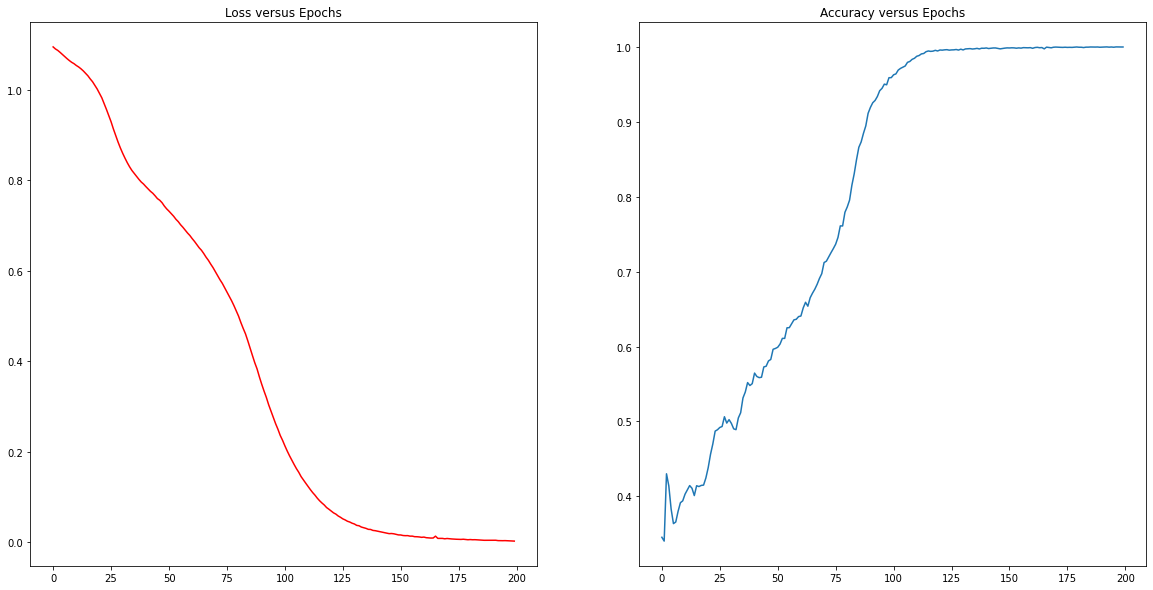

In [ ]:
loss = history.history['loss']
acc = history.history['accuracy']

plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS), loss, c='red')
plt.title('Loss versus Epochs')

plt.subplot(1,2,2)
plt.plot(range(EPOCHS), acc)
plt.title('Accuracy versus Epochs')

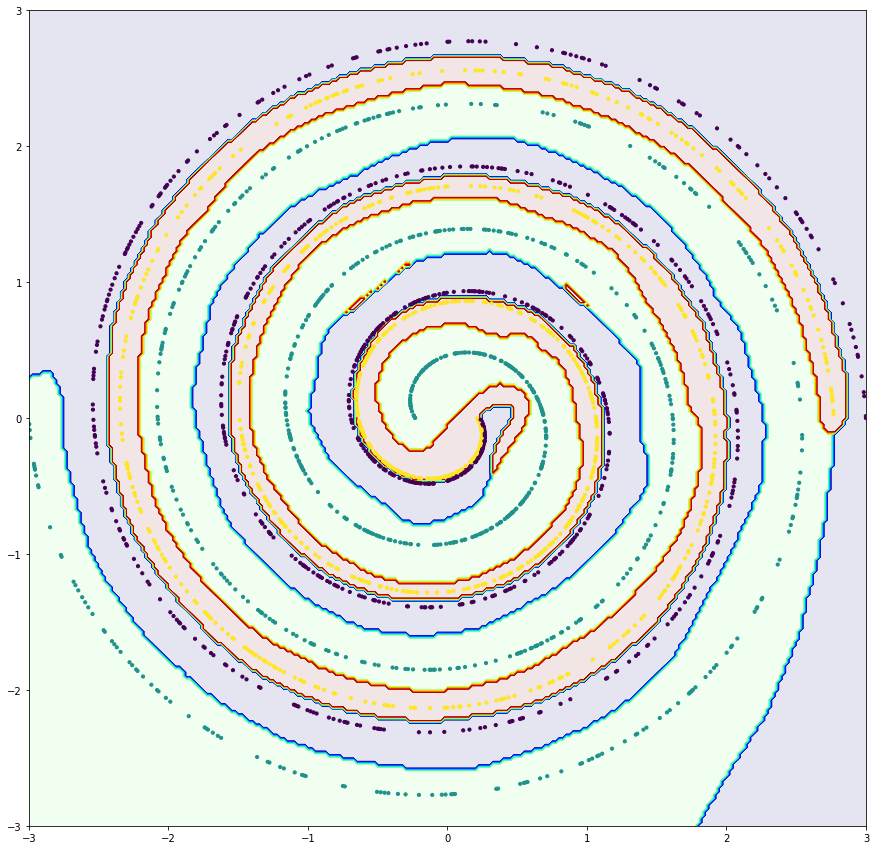

In [ ]:
plot_decision_boundary(X_test, Y_test, spiral_model)